# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import random
import datetime
import seaborn as sns
from pprint import pprint

#Import API Keys
from api_keys import api_key

# Import citipy to determine city based on latitude and longitude
from citipy import citipy


In [8]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat_lng_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_lng_list.append(lat_lng)

# Print the city count to confirm sufficient count
len(cities)

747

In [10]:
#Create dataframe with list of cities
df = pd.DataFrame(cities)
df = df.rename(columns={0: 'city'})

#Add lat and lngs to dataframe, create separate columns for lats and longs
df['lat_lngs'] = lat_lng_list
df['lat'] = df.lat_lngs.map(lambda x: str(x[0]))
df['long'] = df.lat_lngs.map(lambda x: str(x[1]))

df.head()

,city,lat_lngs,lat,long
0,clyde river,"(72.215845599571, -82.83386044880689)",72.215845599571,-82.83386044880689
1,ushuaia,"(-60.60988334022177, -54.90046397944134)",-60.60988334022177,-54.90046397944134
2,santa maria,"(17.365409661683884, -20.867597749978643)",17.365409661683884,-20.867597749978643
3,yellowknife,"(67.83096814055853, -112.9967641072887)",67.83096814055853,-112.9967641072887
4,jamestown,"(-21.923852961333196, -15.678871848189146)",-21.923852961333196,-15.678871848189146


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
api_key = '4228ba0bf4de028fe4647cb1b43ebc1b' #deactivated for security and publication

#Create columns for data to be collecting from the API
df['temp'] = ""
df['max_temp'] = ""
df['humidity'] = ""
df['wind_speed'] = ""
df['clouds'] = ""

#Iterate over each row as index pairs
#Include a print log of each city as it'sbeing processed (with the city number and city name)
for index, row in df.iterrows():
    city = row['city']
    print(f"Processing Record {index + 1} | {city}")
    city = city.replace(" ", "&")
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=" + city + "&APPID=" + api_key
    print(url)
    weather = requests.get(url).json()
    try:
        df.loc[index, 'temp'] = weather['main']['temp']
        df.loc[index, 'max_temp'] = weather['main']['temp_max']
        df.loc[index, 'humidity'] = weather['main']['humidity']
        df.loc[index, 'wind_speed'] = weather['wind']['speed']
        df.loc[index, 'clouds'] = weather['clouds']['all']
    except:
        df.loc[index, 'temp'] = 'city not found'
        df.loc[index, 'humidity'] = 'city not found'
        df.loc[index, 'wind_speed'] = 'city not found'
        df.loc[index, 'clouds'] = 'city not found'
    time.sleep(.50)
    
print("----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Processing Record 1 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=clyde&river&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ushuaia&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 3 | santa maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=santa&maria&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 4 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=yellowknife&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 5 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=jamestown&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 6 | russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=russell&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 7 | naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=naze&APPID=4228ba0bf4de028fe4647cb1

Processing Record 58 | ronneby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ronneby&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 59 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=pevek&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 60 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=carnarvon&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 61 | lixourion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=lixourion&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 62 | roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=roald&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 63 | pleshanovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=pleshanovo&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 64 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kapaa&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Proc

Processing Record 115 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=nizhneyansk&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 116 | babanusah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=babanusah&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 117 | wewak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=wewak&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 118 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=longyearbyen&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 119 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=petropavlovsk-kamchatskiy&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 120 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=vaini&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 121 | ternate
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 172 | tombouctou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=tombouctou&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 173 | tabiauea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=tabiauea&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 174 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=pangnirtung&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 175 | samus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=samus&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 176 | goundam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=goundam&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 177 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=portland&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 178 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=severo-kurilsk&APPID=4228

Processing Record 229 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=grindavik&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 230 | soe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=soe&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 231 | kazerun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kazerun&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 232 | sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sinnamary&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 233 | olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=olafsvik&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 234 | toliary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=toliary&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 235 | den helder
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=den&helder&APPID=4228ba0bf4de028fe4647cb1

Processing Record 286 | oktyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=oktyabrskiy&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 287 | bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bilma&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 288 | lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=lata&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 289 | olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=olinda&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 290 | ranau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ranau&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 291 | yarmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=yarmouth&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 292 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sao&jose&da&coroa&grande&APPID=4228

Processing Record 343 | tukan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=tukan&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 344 | huallanca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=huallanca&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 345 | mola di bari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mola&di&bari&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 346 | soyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=soyo&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 347 | acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=acapulco&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 348 | hastings
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hastings&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 349 | westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=westport&APPID=4228ba0bf4de028fe4647c

Processing Record 401 | bereda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bereda&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 402 | charlestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=charlestown&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 403 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=alofi&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 404 | nang rong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=nang&rong&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 405 | pueblo nuevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=pueblo&nuevo&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 406 | saint-louis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=saint-louis&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 407 | kampot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kampot&APPID=4228ba0bf4

Processing Record 458 | krasnyy chikoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=krasnyy&chikoy&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 459 | galveston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=galveston&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 460 | morros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=morros&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 461 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=attawapiskat&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 462 | nichinan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=nichinan&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 463 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kaitangata&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 464 | ghanzi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ghanzi&APPID=

Processing Record 515 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=los&llanos&de&aridane&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 516 | slimnic
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=slimnic&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 517 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hambantota&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 518 | jiangyou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=jiangyou&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 519 | arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=arlit&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 520 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=srednekolymsk&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 521 | polunochnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 572 | bure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bure&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 573 | ovalle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ovalle&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 574 | campeche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=campeche&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 575 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kavaratti&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 576 | puerto suarez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=puerto&suarez&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 577 | bonfim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bonfim&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 578 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=richards&bay&APPID=4228ba0bf4de02

Processing Record 629 | belaya gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=belaya&gora&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 630 | pochutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=pochutla&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 631 | tuggurt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=tuggurt&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 632 | cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=cairns&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 633 | manacapuru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=manacapuru&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 634 | townsville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=townsville&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 635 | aktau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=aktau&APPID=4228ba0bf4de028f

Processing Record 685 | fort collins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=fort&collins&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 686 | carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=carutapera&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 687 | oncesti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=oncesti&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 688 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bolungarvik&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 689 | mocuba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mocuba&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 690 | yingcheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=yingcheng&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 691 | waddan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=waddan&APPID=4228ba0b

Processing Record 741 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=lompoc&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 742 | lodwar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=lodwar&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 743 | punta cardon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=punta&cardon&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 744 | kalmunai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kalmunai&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 745 | ortakoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ortakoy&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 746 | menongue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=menongue&APPID=4228ba0bf4de028fe4647cb1b43ebc1b
Processing Record 747 | dalbandin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=dalbandin&APPID=4228ba0bf4de028fe4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#Remove cities that could not be found from the dataframe
df = df[df.temp != 'city not found']

#Check that there are still 500+ records
len(df)

662

In [14]:
#Convert lat from string to float object
df.lat = df.lat.astype(float)
df.head()

,city,lat_lngs,lat,long,temp,max_temp,humidity,wind_speed,clouds
0,clyde river,"(72.215845599571, -82.83386044880689)",72.215846,-82.83386044880689,44.01,44.01,90,4.79,100
1,ushuaia,"(-60.60988334022177, -54.90046397944134)",-60.609883,-54.90046397944134,50.29,51.8,66,31.09,40
2,santa maria,"(17.365409661683884, -20.867597749978643)",17.365410,-20.867597749978643,82.52,82.52,80,8.68,100
3,yellowknife,"(67.83096814055853, -112.9967641072887)",67.830968,-112.9967641072887,45.25,46.99,39,17.22,20
4,jamestown,"(-21.923852961333196, -15.678871848189146)",-21.923853,-15.678871848189146,50.3,50.3,80,5.17,10


In [15]:
#Export dataframe to CSV
df.to_csv("cities.csv", encoding="utf-8", index=False)

In [16]:
df.head()

,city,lat_lngs,lat,long,temp,max_temp,humidity,wind_speed,clouds
0,clyde river,"(72.215845599571, -82.83386044880689)",72.215846,-82.83386044880689,44.01,44.01,90,4.79,100
1,ushuaia,"(-60.60988334022177, -54.90046397944134)",-60.609883,-54.90046397944134,50.29,51.8,66,31.09,40
2,santa maria,"(17.365409661683884, -20.867597749978643)",17.365410,-20.867597749978643,82.52,82.52,80,8.68,100
3,yellowknife,"(67.83096814055853, -112.9967641072887)",67.830968,-112.9967641072887,45.25,46.99,39,17.22,20
4,jamestown,"(-21.923852961333196, -15.678871848189146)",-21.923853,-15.678871848189146,50.3,50.3,80,5.17,10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

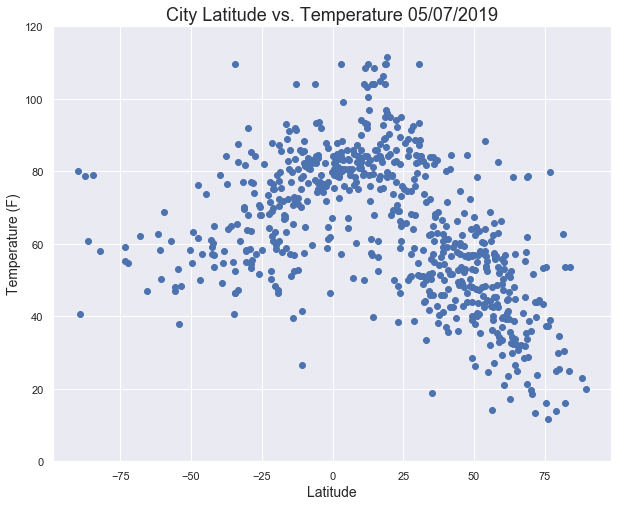

In [17]:
#Pull in today's date for graphs
date = datetime.date.today()
date = time.strftime("%m/%d/%Y")

sns.set()
plt.figure(figsize=(10,8))
plt.scatter(df['lat'], df['temp'])
plt.title(f"City Latitude vs. Temperature {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Temperature (F)", fontsize="14")
plt.ylim(0, 120)

plt.savefig("Temperature.png")

plt.show()
#Trend #1 - The temperature is warmer in the Northern Hemisphere

#### Latitude vs. Humidity Plot

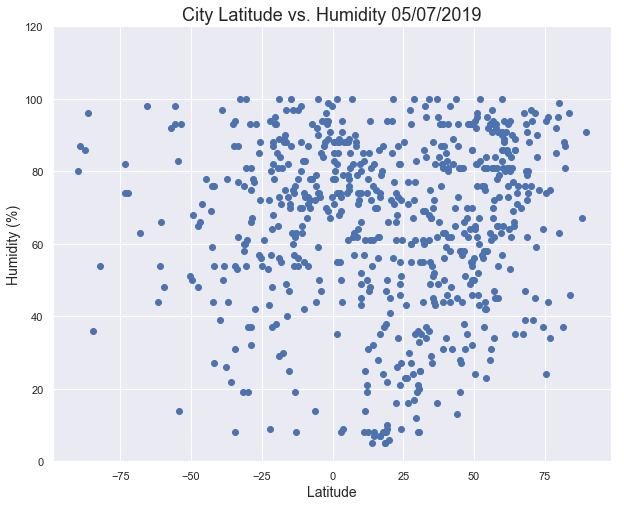

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(df['lat'], df['humidity'])                              
plt.title(f"City Latitude vs. Humidity {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Humidity (%)", fontsize="14")

plt.ylim(0,120)

plt.savefig("Humidity.png")

plt.show()
#Trend #2 - Latitude does not appear to impact humidity

#### Latitude vs. Cloudiness Plot

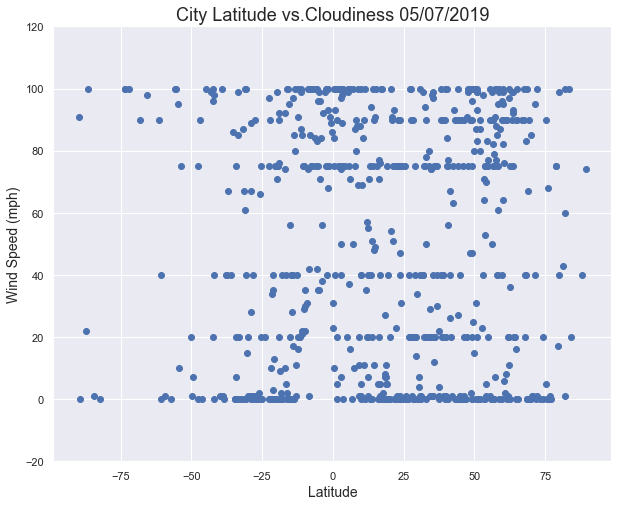

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(df['lat'], df['clouds'])                              
plt.title(f"City Latitude vs.Cloudiness {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Wind Speed (mph)", fontsize="14")
plt.ylim(-20, 120)

plt.savefig("Cloudiness.png")

plt.show()
#Trend #2 - Latitude does not appear to impact cloudiness

#### Latitude vs. Wind Speed Plot

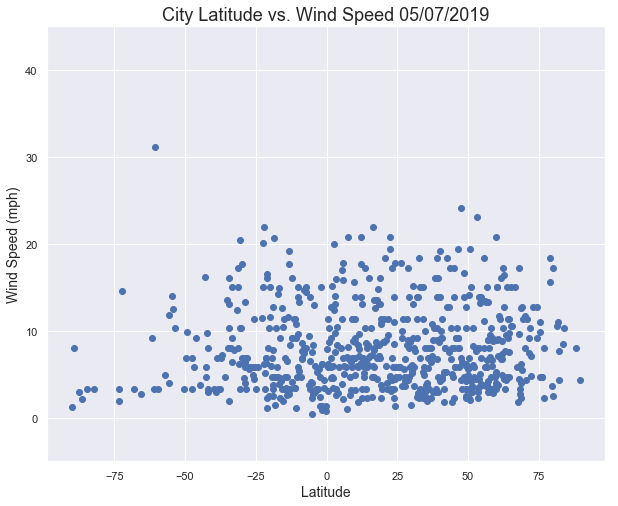

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(df['lat'], df['wind_speed'])                              
plt.title(f"City Latitude vs. Wind Speed {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Wind Speed (mph)", fontsize="14")

plt.ylim(-5,45)

plt.savefig("Wind_Speed.png")

plt.show()
#Trend #2 - Latitude does not appear to greatly impact wind speed